In [1]:
# Importation des modules

import pandas as pd
from gensim.models import Word2Vec
import random
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import datetime

#Affichage de toutes les colonnes

pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv("data/data_cleaned_NLP.csv", sep = ',', encoding = 'latin-1')

In [5]:
def toweekday(date):
    
    dic = {
            0 : "Lundi", 
            1 : "Mardi",
            2 : "Mercredi",
            3 : "Jeudi",
            4 : "Vendredi",
            5 : "Samedi",
            6 : "Dimanche"
            }
    
    date1 = datetime.datetime.strptime(date, '%Y-%m-%d')
    num = date1.weekday()
    
    return(dic[num])

df['Jour'] = df["Date"].apply(toweekday)

In [6]:
df

,Unnamed: 0,Unnamed: 0.1,Orateur,Date,Nature.de.séance,Président.de.séance,Sujet.débattu,Réplique,Didascalie,Président.de.séance_propre,nom.famille,sexe,age,groupe.sigle,commissions,nb.mandats,cabcollab,duree.pol,clustRFSP,clustVEP,hautdip,naissance_an,majo,profsigni2,ID,Groupe,time_floor,tokenized_replique,tokenized_didascalie,stemmed_replique,stemmed_didascalie,Jour
0,0,1,adrien morenas,2019-11-04,Projet de loi de finances pour 2020,Présidence de M. Hugues Renson,NaN,Si vous y donnez un avis favorable madame la ...,NaN,Présidence de M. Hugues Renson,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,1,Exp,2019-11-01,si donnez avis favorable madame secrétaire éta...,NaN,si don avis favor madam secrétair état dissip ...,NaN,Lundi
1,1,2,adrien morenas,2019-11-04,Projet de loi de finances pour 2020,Présidence de M. Hugues Renson,NaN,Plus généralement je soutiendrai un autre ame...,NaN,Présidence de M. Hugues Renson,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,2,Exp,2019-11-01,plus généralement soutiendrai autre amendement...,NaN,plus général soutiendr autr amend vis demand g...,NaN,Lundi
2,2,3,adrien morenas,2019-07-02,Questions au Gouvernement,Présidence de M. Richard Ferrand,Convention citoyenne sur le climat,Ma question sadresse à M. François de Rugy ...,NaN,Présidence de M. Richard Ferrand,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,3,Exp,2019-07-01,question adresse françois rugy ministre état m...,NaN,question adress françois rugy ministr état min...,NaN,Mardi
3,3,4,adrien morenas,2018-02-01,Accès à leau,Présidence de Mme Carole Bureau-Bonnard,Discussion générale,Le 1,NaN,Présidence de Mme Carole Bureau-Bonnard,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,4,Exp,2018-02-01,NaN,NaN,NaN,NaN,Jeudi
4,4,5,adrien morenas,2020-05-08,Prorogation de létat durgence sanitaire,Présidence de Mme Laetitia Saint-Paul,Discussion des articles,Cette autorisation strictement encadrée par l...,NaN,Présidence de Mme Laetitia Saint-Paul,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,5,Exp,2020-05-01,cette autorisation strictement encadrée décret...,NaN,cet autoris strict encadr décret appliqu effet...,NaN,Vendredi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499838,499838,499839,zivka park,2018-11-05,Projet de loi de finances pour 2019,Présidence de M. Marc Le Fur,NaN,rapporteure pour avis de la commission du dév...,NaN,Présidence de M. Marc Le Fur,Park,F,32,LREM,DvptDurable,0,False,0,1 - Soc. civile,1 - Novice,ScPo,1985,True,cadsupprive,499839,Novice,2018-11-01,rapporteure avis commission développement dura...,NaN,rapporteur avis commiss développ durabl aménag...,NaN,Lundi
499839,499839,499840,zivka park,2019-09-12,Mobilités,Présidence de M. Sylvain Waserman,Discussion des articles,rapporteure. Avis défavorable. Les agents des...,NaN,Présidence de M. Sylvain Waserman,Park,F,32,LREM,DvptDurable,0,False,0,1 - Soc. civile,1 - Novice,ScPo,1985,True,cadsupprive,499840,Novice,2019-09-01,rapporteure avis défavorable agents sociétés s...,NaN,rapporteur avis défavor agent societ sécur pri...,NaN,Jeudi
499840,499840,499841,zivka park,2018-02-20,Débat sur la couverture numérique du territoire,Présidence de M. Sylvain Waserman,NaN,Selon lARCEP les opérateurs dépenseront 3 à ...,NaN,Présidence de M. Sylvain Waserman,Park,F,32,LREM,DvptDurable,0,False,0,1 - Soc. civile,1 - Novice,ScPo,1985,True,cadsupprive,499841,Novice,2018-02-01,selon arcep opérateurs dépenseront milliards e...,NaN,selon arcep oper dépens milliard euros plus le...,NaN,Mardi
499841,499841,499842,zivka park,2019-06-14,Mobilités,Présidence de Mme Carole Bureau-Bonnard,Discussion des articles,rapporteure. Je comprends votre préoccupation...,NaN,Présidence de Mme Carole Bureau-Bonnard,Park,F,32,L

In [8]:
w2v_model_all = Word2Vec.load('results/word2vec_all_300.model')

In [9]:
w2v_model_all.init_sims(replace = True)

In [10]:
dfc = df.copy()

In [11]:
dfc['Date'][0]

'2019-11-04'

In [12]:
def datecroiss(s):
    #transforme un str de date en un int qu'on peut ranger par ordre croissant : 03/02/2019-->20190203 (AAAAMMJJ)
    
    AAAA = s[0:4]
    MM = s[5:7]
    JJ = s[8:10]
    return int(AAAA+MM+JJ)

def annee(s):
    return int(s[0:4])

In [13]:
dfc['Datec'] = dfc['Date'].apply(datecroiss)
dfc['Annee'] = dfc['Date'].apply(annee)

In [14]:
dfc.head()

,Unnamed: 0,Unnamed: 0.1,Orateur,Date,Nature.de.séance,Président.de.séance,Sujet.débattu,Réplique,Didascalie,Président.de.séance_propre,nom.famille,sexe,age,groupe.sigle,commissions,nb.mandats,cabcollab,duree.pol,clustRFSP,clustVEP,hautdip,naissance_an,majo,profsigni2,ID,Groupe,time_floor,tokenized_replique,tokenized_didascalie,stemmed_replique,stemmed_didascalie,Jour,Datec,Annee
0,0,1,adrien morenas,2019-11-04,Projet de loi de finances pour 2020,Présidence de M. Hugues Renson,NaN,Si vous y donnez un avis favorable madame la ...,NaN,Présidence de M. Hugues Renson,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,1,Exp,2019-11-01,si donnez avis favorable madame secrétaire éta...,NaN,si don avis favor madam secrétair état dissip ...,NaN,Lundi,20191104,2019
1,1,2,adrien morenas,2019-11-04,Projet de loi de finances pour 2020,Présidence de M. Hugues Renson,NaN,Plus généralement je soutiendrai un autre ame...,NaN,Présidence de M. Hugues Renson,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,2,Exp,2019-11-01,plus généralement soutiendrai autre amendement...,NaN,plus général soutiendr autr amend vis demand g...,NaN,Lundi,20191104,2019
2,2,3,adrien morenas,2019-07-02,Questions au Gouvernement,Présidence de M. Richard Ferrand,Convention citoyenne sur le climat,Ma question sadresse à M. François de Rugy ...,NaN,Présidence de M. Richard Ferrand,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,3,Exp,2019-07-01,question adresse françois rugy ministre état m...,NaN,question adress françois rugy ministr état min...,NaN,Mardi,20190702,2019
3,3,4,adrien morenas,2018-02-01,Accès à leau,Présidence de Mme Carole Bureau-Bonnard,Discussion générale,Le 1,NaN,Présidence de Mme Carole Bureau-Bonnard,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,4,Exp,2018-02-01,NaN,NaN,NaN,NaN,Jeudi,20180201,2018
4,4,5,adrien morenas,2020-05-08,Prorogation de létat durgence sanitaire,Présidence de Mme Laetitia Saint-Paul,Discussion des articles,Cette autorisation strictement encadrée par l...,NaN,Présidence de Mme Laetitia Saint-Paul,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,5,Exp,2020-05-01,cette autorisation strictement encadrée décret...,NaN,cet autoris strict encadr décret appliqu effet...,NaN,Vendredi,20200508,2020


In [15]:
df_exp_2019.head()

NameError: name 'df_exp_2019' is not defined

In [16]:
def add_groupe(L, etiquette):
    return [i + etiquette for i in L]

In [17]:
def moyenne(L):
    s = 0
    for l in L:
        s= s + l
        
    return s/len(L)

In [18]:
def SansInf(L): 
    #On enleve les inf des listes, pour pouvoir calculer la moyenne
    
    Lbis = []
    for i in L:
        if i != float('inf'):
            Lbis.append(i)
            
    return Lbis

### 2020

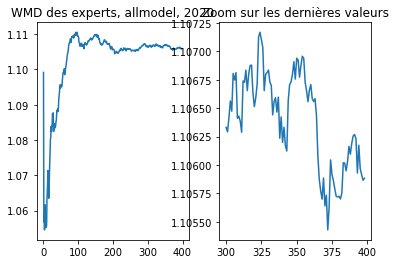

In [19]:
filtre1 = dfc['Groupe'] == 'Novice'
filtre2 = dfc['Annee'] == 2020
filtre3 = dfc['Groupe'] == 'Exp'

df_novice_2020 = dfc.where(filtre1 & filtre2).dropna().copy()
df_exp_2020 = dfc.where(filtre3 & filtre2).dropna().copy()

df_novice_2020_shuffled = df_novice_2020.sample(frac=1) #taille de la base : 871
phrases_novice_2020 = [df_novice_2020_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 400)]

WMD_novices_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_novice_2020[i], '_Novice'), 
            add_groupe(phrases_novice_2020[i + 1], '_Novice')) 
    for i in range(0, 800, 2)
                        ]
SI_N_2020 = SansInf(WMD_novices_allmodel)
means_novice_allmodel_2020 = [moyenne(SI_N_2020[:i]) for i in range(1, 400)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_novice_allmodel_2020)
a[0].set_title("WMD des experts, allmodel, 2020")

a[1].plot([i for i in range(300,399)],means_novice_allmodel_2020[300:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

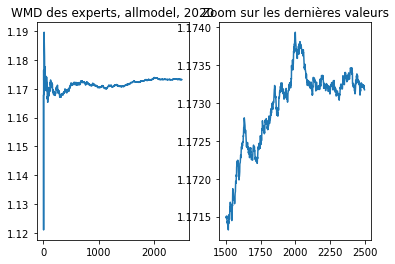

In [20]:
df_exp_2020_shuffled = df_exp_2020.sample(frac=1) #Taille de la base : 5062
phrases_exp_2020 = [df_exp_2020_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 *2500)]

WMD_exp_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_exp_2020[i], '_Exp'), 
            add_groupe(phrases_exp_2020[i + 1], '_Exp')) 
    for i in range(0, 5000, 2)
                        ]

SI_E_2020 = SansInf(WMD_exp_allmodel)
means_exp_allmodel_2020 = [moyenne(SI_E_2020[:i]) for i in range(1, 2500)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_exp_allmodel_2020)
a[0].set_title("WMD des experts, allmodel, 2020")

a[1].plot([i for i in range(1500,2499)],means_exp_allmodel_2020[1500:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

### 2019

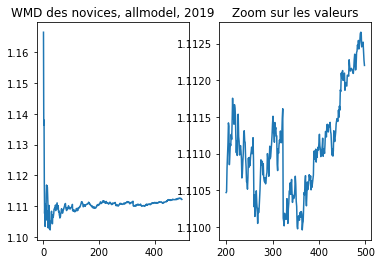

In [21]:
filtre1 = dfc['Groupe'] == 'Novice'
filtre2 = dfc['Annee'] == 2019
filtre3 = dfc['Groupe'] == 'Exp'

df_novice_2019 = dfc.where(filtre1 & filtre2).dropna().copy()
df_exp_2019 = dfc.where(filtre3 & filtre2).dropna().copy()

df_novice_2019_shuffled = df_novice_2019.sample(frac=1) #taille de la base : 1152
phrases_novice_2019 = [df_novice_2019_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 500)]

WMD_novices_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_novice_2019[i], '_Novice'), 
            add_groupe(phrases_novice_2019[i + 1], '_Novice')) 
    for i in range(0, 1000, 2)
                        ]

SI_N_2019 = SansInf(WMD_novices_allmodel)
means_novice_allmodel_2019 = [moyenne(SI_N_2019[:i]) for i in range(1, 500)]


fig,a =  plt.subplots(1,2)

a[0].plot(means_novice_allmodel_2019)
a[0].set_title("WMD des novices, allmodel, 2019")

a[1].plot([i for i in range(200,499)],means_novice_allmodel_2019[200:])
a[1].set_title("Zoom sur les valeurs")
plt.show()

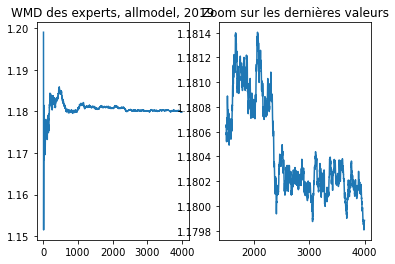

In [22]:
df_exp_2019_shuffled = df_exp_2019.sample(frac=1) #Taille de la base : 8000
phrases_exp_2019 = [df_exp_2019_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 *4000)]

WMD_exp_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_exp_2019[i], '_Exp'), 
            add_groupe(phrases_exp_2019[i + 1], '_Exp')) 
    for i in range(0, 8000, 2)
                        ]

SI_E_2019 = SansInf(WMD_exp_allmodel)
means_exp_allmodel_2019 = [moyenne(SI_E_2019[:i]) for i in range(1, 4000)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_exp_allmodel_2019)
a[0].set_title("WMD des experts, allmodel, 2019")

a[1].plot([i for i in range(1500,3999)],means_exp_allmodel_2019[1500:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

### 2018

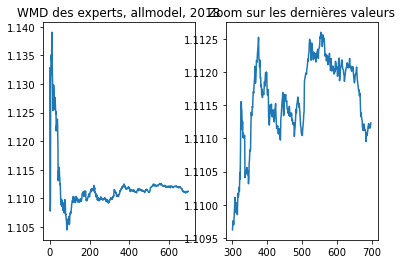

In [23]:
filtre1 = dfc['Groupe'] == 'Novice'
filtre2 = dfc['Annee'] == 2018
filtre3 = dfc['Groupe'] == 'Exp'

df_novice_2018 = dfc.where(filtre1 & filtre2).dropna().copy()
df_exp_2018 = dfc.where(filtre3 & filtre2).dropna().copy()

df_novice_2018_shuffled = df_novice_2018.sample(frac=1) #taille de la base : 1500
phrases_novice_2018 = [df_novice_2018_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 700)]

WMD_novices_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_novice_2018[i], '_Novice'), 
            add_groupe(phrases_novice_2018[i + 1], '_Novice')) 
    for i in range(0, 1400, 2)
                        ]
SI_N_2018 = SansInf(WMD_novices_allmodel)
means_novice_allmodel_2018 = [moyenne(SI_N_2018[:i]) for i in range(1, 700)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_novice_allmodel_2018)
a[0].set_title("WMD des experts, allmodel, 2018")

a[1].plot([i for i in range(300,699)],means_novice_allmodel_2018[300:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

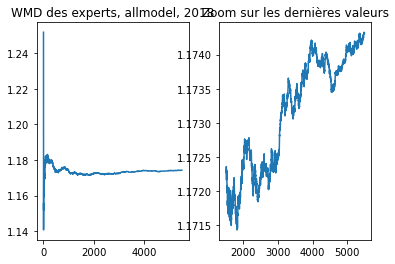

In [24]:
df_exp_2018_shuffled = df_exp_2018.sample(frac=1) #Taille de la base : 11583
phrases_exp_2018 = [df_exp_2018_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 *5500)]

WMD_exp_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_exp_2018[i], '_Exp'), 
            add_groupe(phrases_exp_2018[i + 1], '_Exp')) 
    for i in range(0, 11000, 2)
                        ]

SI_E_2019 = SansInf(WMD_exp_allmodel)
means_exp_allmodel_2018 = [moyenne(SI_E_2019[:i]) for i in range(1, 5500)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_exp_allmodel_2018)
a[0].set_title("WMD des experts, allmodel, 2018")

a[1].plot([i for i in range(1500,5499)],means_exp_allmodel_2018[1500:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

### 2017

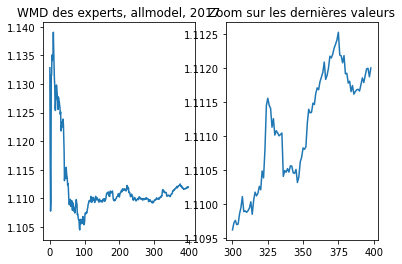

In [25]:
filtre1 = dfc['Groupe'] == 'Novice'
filtre2 = dfc['Annee'] == 2017
filtre3 = dfc['Groupe'] == 'Exp'

df_novice_2017 = dfc.where(filtre1 & filtre2).dropna().copy()
df_exp_2017 = dfc.where(filtre3 & filtre2).dropna().copy()

df_novice_2017_shuffled = df_novice_2017.sample(frac=1) #taille de la base : 825
phrases_novice_2017 = [df_novice_2017_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 400)]

WMD_novices_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_novice_2017[i], '_Novice'), 
            add_groupe(phrases_novice_2017[i + 1], '_Novice')) 
    for i in range(0, 800, 2)
                        ]
SI_N_2017 = SansInf(WMD_novices_allmodel)
means_novice_allmodel_2017 = [moyenne(SI_N_2018[:i]) for i in range(1, 400)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_novice_allmodel_2017)
a[0].set_title("WMD des experts, allmodel, 2017")

a[1].plot([i for i in range(300,399)],means_novice_allmodel_2017[300:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

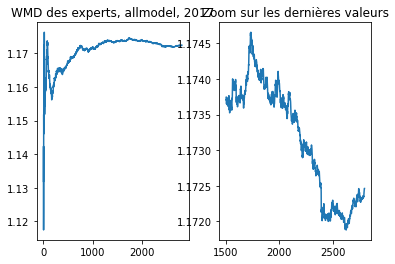

In [26]:
df_exp_2017_shuffled = df_exp_2017.sample(frac=1) #Taille de la base : 5705
phrases_exp_2017 = [df_exp_2017_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 *2800)]

WMD_exp_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_exp_2017[i], '_Exp'), 
            add_groupe(phrases_exp_2017[i + 1], '_Exp')) 
    for i in range(0, 5600, 2)
                        ]

SI_E_2017 = SansInf(WMD_exp_allmodel)
means_exp_allmodel_2017 = [moyenne(SI_E_2017[:i]) for i in range(1, 2800)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_exp_allmodel_2017)
a[0].set_title("WMD des experts, allmodel, 2017")

a[1].plot([i for i in range(1500,2799)],means_exp_allmodel_2017[1500:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

In [27]:
#On va comparer les distances intra de chaque modele selon le temps

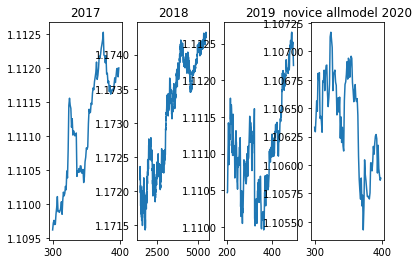

In [28]:
fig, a = plt.subplots(1,4)

a[3].plot([i for i in range(300,399)],means_novice_allmodel_2020[300:])
a[3].set_title("novice allmodel 2020")

a[2].plot([i for i in range(200,499)],means_novice_allmodel_2019[200:])
a[2].set_title("2019")

a[1].plot([i for i in range(1500,5499)],means_exp_allmodel_2018[1500:])
a[1].set_title("2018")

a[0].plot([i for i in range(300,399)],means_novice_allmodel_2017[300:])
a[0].set_title("2017")

plt.show()

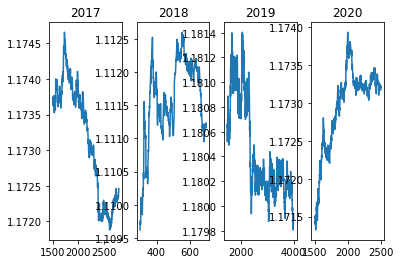

In [29]:
fig, a = plt.subplots(1,4)

a[3].plot([i for i in range(1500,2499)],means_exp_allmodel_2020[1500:])
a[3].set_title("2020")

a[2].plot([i for i in range(1500,3999)],means_exp_allmodel_2019[1500:])
a[2].set_title("2019")

a[1].plot([i for i in range(300,699)],means_novice_allmodel_2018[300:])
a[1].set_title("2018")

a[0].plot([i for i in range(1500,2799)],means_exp_allmodel_2017[1500:])
a[0].set_title("2017")

plt.show()

# Distance mesurée jour par jour

In [68]:
dfd = dfc[['Date', 'Groupe', 'tokenized_replique']].copy()

In [69]:
dfd['days'] = dfd.apply(lambda row : (datetime.date(int(row.Date[:4]),int(row.Date[5:7]),int(row.Date[8:])) - 
                    datetime.date(2017,6,28)).days, axis = 1)

In [167]:
def calcule_WMD_intervalle(d1, d2):
    
    df0 = dfd[dfd['days'] >= d1]
    df0 = df0[df0['days'] < d2]
    
    df_Novice = df0[df0['Groupe'] == 'Novice']
    df_Exp = df0[df0['Groupe'] == 'Exp']
    
    try:
        df_Novice = df0[df0['Groupe'] == 'Novice'].sample(50).dropna()
        df_Exp = df0[df0['Groupe'] == 'Exp'].sample(50).dropna()
        print(df_Exp.shape, df_Novice.shape)
    except:
        return np.nan
    
    phrases_Exp = [df_Exp.iloc[i]['tokenized_replique'].split(' ') for i in range(df_Exp.shape[0])]
    phrases_Novice = [df_Novice.iloc[i]['tokenized_replique'].split(' ') for i in range(df_Novice.shape[0])]
    
    WMD = []
    
    

    for i in phrases_Novice:
        value = np.mean([w2v_model_all.wv.wmdistance(add_groupe(i, '_Novice'), 
                                                     add_groupe(j, '_Exp')) for j in phrases_Exp])
        WMD.append(value)

    return np.mean(WMD)
    

In [168]:
calcule_WMD_intervalle(0, 15)

(50, 4) (49, 4)


1.5083563458421048

In [169]:
max(dfd.days)

1093

In [170]:
L = [calcule_WMD_intervalle(i, i + 14) for i in range(0, 1094, 14)]

(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(49, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(49, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(49, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(49, 4) (50, 4)
(49, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) (50, 4)
(49, 4) (50, 4)
(50, 4) (50, 4)
(50, 4) 

In [178]:
px.line([i for i in L if not(str(i) in ['nan', 'inf'])])

In [179]:
M = [i for i in L if not(str(i) in ['nan', 'inf'])]

In [183]:
px.line([np.mean(M[:i]) for i in range(1,len(M))])